In [382]:
# IMPORT THE NECESSARY LIBRARIES / MODELS
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import streamlit as st
import joblib
import pickle 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Here are the description on the column of this specific dataset 
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [383]:
#LOADING THE DATASET 
cb_dataset = pd.read_csv("telco_data.csv")
cb_dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [384]:
#Check info for dataset 
cb_dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- there are no null values in this dataset 

## Question 1: What is the overall churn rate?
 What is the overall churn rate?

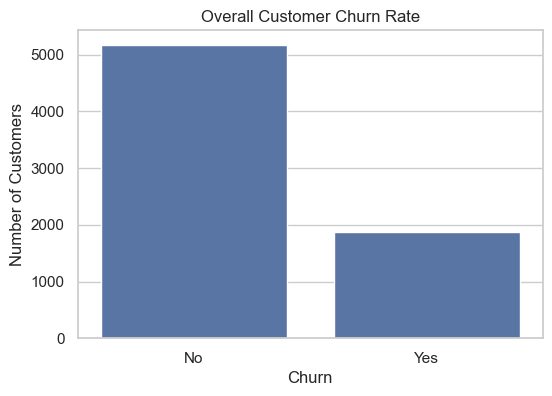

Churn Rate:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [385]:

# Set the style for the plots
sns.set(style="whitegrid")

# Create a count plot for the 'Churn' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=cb_dataset)
plt.title('Overall Customer Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

# Calculate the churn percentage
churn_rate = cb_dataset['Churn'].value_counts(normalize=True) * 100
print(f"Churn Rate:\n{churn_rate}")



- What the Chart Shows: The first bar chart gives us a baseline. It shows that a significant majority of customers in this dataset did not churn
 

# Question 2 ; Does internet service type influence the churn rate 

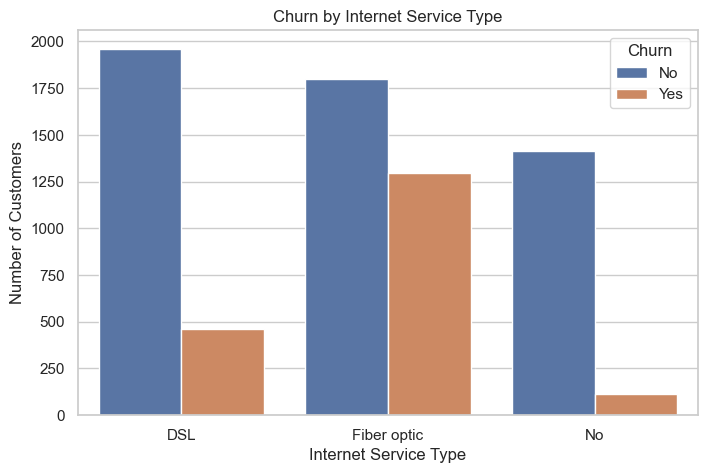

In [386]:
# Does internet service type influence the churn rate 
# Create a count plot for churn by internet service type
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=cb_dataset)
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()

- What the Chart Shows: 

Customers with Fiber optic internet service have a much higher churn rate compared to those with DSL. Customers with no internet service have a very low churn rate.
- Why This Might Be
 
Higher Cost & Expectations: Fiber optic service is typically more expensive. Customers paying a premium may have higher expectations for speed and reliability. Any service disruption or issue could lead to greater frustration and a quicker decision to churn. The "Monthly Charges" chart supports this, as we'll see next.


## Question 3 ; Is there a difference in churn based on payment method?

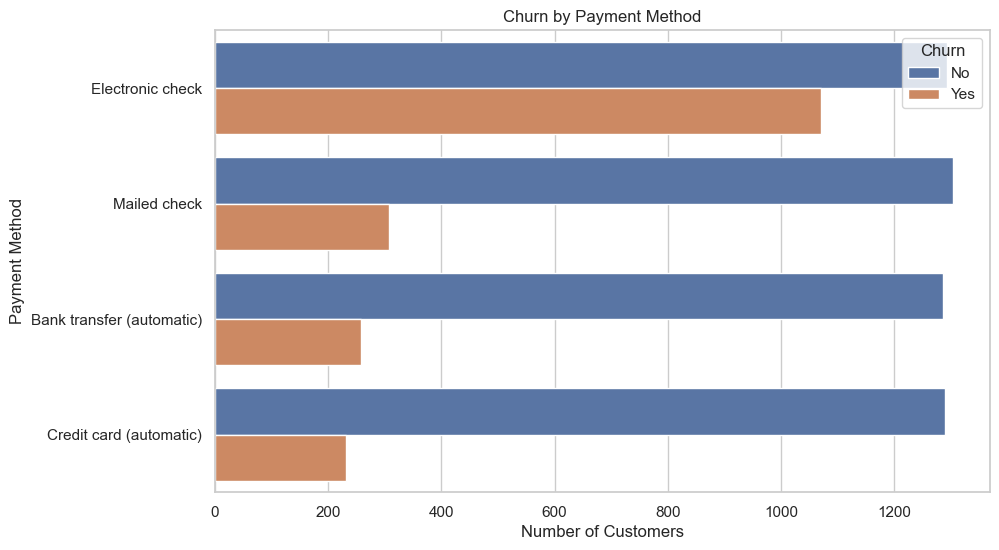

In [387]:
# Create a count plot for churn by payment method
plt.figure(figsize=(10, 6))
sns.countplot(y='PaymentMethod', hue='Churn', data=cb_dataset)
plt.title('Churn by Payment Method')
plt.xlabel('Number of Customers')
plt.ylabel('Payment Method')
plt.legend(title='Churn')
plt.show()

- What the Chart Shows:

 Customers who pay by Electronic check have a significantly higher churn rate than all other payment methods. Customers with automatic payment methods (Bank transfer or Credit card) have the lowest churn rates.
- Why This Might Be:

Manual Effort: Paying by electronic check is a manual process. Each month, the customer has to actively decide to make the payment. This monthly action is a recurring decision point where they can re-evaluate the service and decide to stop.

#  Question 4 : How does tenure relate to customer churn?

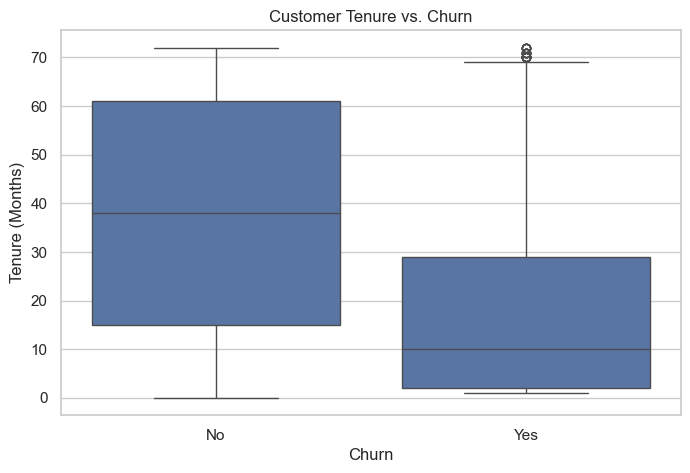

In [388]:
# Create a box plot to see the distribution of tenure for churned and non-churned customers
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=cb_dataset)
plt.title('Customer Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

- What the Chart Shows: 

The box plot clearly illustrates that customers who churn (Yes) tend to have a much shorter tenure. The median tenure for churners is low (around 10 months), while the median for non-churners is much higher (around 38 months).
- Why This Might Be:

Customer Loyalty: Loyalty builds over time. Long-term customers have likely overcome any initial issues and are satisfied with the service. They are less likely to be actively shopping for alternatives.
Early Dissatisfaction: New customers are in an evaluation period. If the service doesn't meet their expectations in the first few months (due to installation issues, billing problems, or service quality), they are highly likely to leave.

- Key Insights from Visualizations: The visualizations highlight that customers with month-to-month contracts, Fiber optic internet service, and those who use electronic checks for payment are more likely to churn. Additionally, customers with shorter tenures and higher monthly charges show a greater tendency to leave

## CREATING THE MODEL 

- data preprocessing 


In [389]:
# Finding out whether the columns i have are necessary 
cb_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [390]:
# Finding pout the data types the columns have
cb_dataset.dtypes 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [391]:
# Dropping the useless columns 
cb_dataset.drop(["customerID" , "Contract"] ,axis=1 , inplace =True)
cb_dataset 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check,74.40,306.6,Yes


In [392]:
#Perform encoding for the features that require the necesary numbers
# 
"""first we call the label encoder function"""
le = LabelEncoder()

"""Step 2 ; Get the feature you need to transform and actually transform it"""
cb_dataset["Dependents"] = le.fit_transform(cb_dataset["Dependents"])
cb_dataset["gender"] = le.fit_transform(cb_dataset["gender"]) #Female = 0 , Male = 1 
cb_dataset["InternetService"] = le.fit_transform(cb_dataset["InternetService"])
cb_dataset["MultipleLines"] = le.fit_transform(cb_dataset["MultipleLines"])
cb_dataset["PaymentMethod"] = le.fit_transform(cb_dataset["PaymentMethod"])
cb_dataset["TotalCharges"] = le.fit_transform(cb_dataset["TotalCharges"])
cb_dataset["MonthlyCharges"] = le.fit_transform(cb_dataset["MonthlyCharges"])
cb_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,0,1,No,1,0,No,Yes,No,No,No,No,Yes,2,142,2505,No
1,1,0,No,0,34,Yes,0,0,Yes,No,Yes,No,No,No,No,3,498,1466,No
2,1,0,No,0,2,Yes,0,0,Yes,Yes,No,No,No,No,Yes,3,436,157,Yes
3,1,0,No,0,45,No,1,0,Yes,No,Yes,Yes,No,No,No,0,266,1400,No
4,0,0,No,0,2,Yes,0,1,No,No,No,No,No,No,Yes,2,729,925,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,Yes,1,24,Yes,2,0,Yes,No,Yes,Yes,Yes,Yes,Yes,3,991,1597,No
7039,0,0,Yes,1,72,Yes,2,1,No,Yes,Yes,No,Yes,Yes,Yes,1,1340,5698,No
7040,0,0,Yes,1,11,No,1,0,Yes,No,No,No,No,No,Yes,2,137,2994,No
7041,1,1,Yes,0,4,Yes,2,1,No,No,No,No,No,No,Yes,3,795,2660,Yes


In [393]:
# Converting multiple binary columns into numbers 

#first we start by identifying the binary columns"""
binary_columns = ["Partner" , "PhoneService" , "OnlineSecurity" , "DeviceProtection" , "OnlineBackup" ,"TechSupport" , "StreamingTV" , "StreamingMovies" , "PaperlessBilling" ,"Churn"]

#The next step is we map Yes to 1  and No to 0 in each column"""
for col in binary_columns:
    cb_dataset[col] = cb_dataset[col].map({"Yes": 1 , "No": 0})

# Lets print the results and see 
cb_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,1.0,0.0,1.0,1.0,1.0,1.0,1,3,991,1597,0
7039,0,0,1,1,72,1,2,1,0.0,1.0,1.0,0.0,1.0,1.0,1,1,1340,5698,0
7040,0,0,1,1,11,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,137,2994,0
7041,1,1,1,0,4,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1,3,795,2660,1


In [394]:
# Check for null values 
cb_dataset.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [395]:
# Eliminate the null vales 
cb_dataset.dropna(inplace=True)

In [396]:
cb_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,1.0,0.0,1.0,1.0,1.0,1.0,1,3,991,1597,0
7039,0,0,1,1,72,1,2,1,0.0,1.0,1.0,0.0,1.0,1.0,1,1,1340,5698,0
7040,0,0,1,1,11,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,137,2994,0
7041,1,1,1,0,4,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1,3,795,2660,1


In [397]:
# Now we define what X and y are 
""" X should represent the varibales we use to predicted the value y
 y is now the value of the prediction  """

#First we define the X 
X = cb_dataset.drop(["Churn"] , axis =1).values
y = cb_dataset["Churn"]

In [398]:
# Print X 
X

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.420e+02,
        2.505e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 4.980e+02,
        1.466e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 4.360e+02,
        1.570e+02],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.370e+02,
        2.994e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 3.000e+00, 7.950e+02,
        2.660e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.388e+03,
        5.407e+03]], shape=(5517, 18))

In [399]:
cb_dataset.info 


<bound method DataFrame.info of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0        

In [400]:
#Print y 
y 

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 5517, dtype: int64

In [401]:
# CREATING THE MODEL . THIS IS A CLASSIFICATION MODEL 
""" First we split the data into training and testing data"""
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.2 , random_state=42 , stratify=y)

#now we train our model using our training dataset 
"""but first we define our model"""
log_reg = LogisticRegression()

#now we fit the model 
log_reg.fit(X_train , y_train)

#now we make the predictions 
y_pred = log_reg.predict(X_test)

#print the predictions 
print(y_pred)


[1 0 0 ... 1 0 0]


c:\Users\Admin\Desktop\Projects\Predicting-Customer-Churn-in-E-commerce\cbenv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [402]:
"""import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Let’s say your data is in a DataFrame called X (only numeric features)
# If your data includes encoded categorical variables, that’s okay

# OPTIONAL: Standardize data (improves numerical stability)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # or your full data

# Convert back to DataFrame (helps track feature names)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)

# Step 3: Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Show the results
print(vif_data.sort_values(by='VIF', ascending=False))"""


"import pandas as pd\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\nfrom sklearn.preprocessing import StandardScaler\n\n# Let’s say your data is in a DataFrame called X (only numeric features)\n# If your data includes encoded categorical variables, that’s okay\n\n# OPTIONAL: Standardize data (improves numerical stability)\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X_train)  # or your full data\n\n# Convert back to DataFrame (helps track feature names)\nX_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)\n\n# Step 3: Calculate VIF for each feature\nvif_data = pd.DataFrame()\nvif_data['Feature'] = X_scaled_df.columns\nvif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]\n\n# Show the results\nprint(vif_data.sort_values(by='VIF', ascending=False))"

In [403]:
# Print the accuracy of the prediction
accuracy = accuracy_score(y_test , y_pred)
print(f"Accuracy of the model :{accuracy:.2f}")

Accuracy of the model :0.75


In [404]:
# Printing the accuracy of the model 
print(" ----- Classification Report -----")
print ("Accuracy : " ,accuracy_score(y_test , y_pred))
print(classification_report(y_test, y_pred, target_names=["Not Churn", "Churn"]))


 ----- Classification Report -----
Accuracy :  0.7490942028985508
              precision    recall  f1-score   support

   Not Churn       0.79      0.86      0.82       753
       Churn       0.63      0.51      0.56       351

    accuracy                           0.75      1104
   macro avg       0.71      0.68      0.69      1104
weighted avg       0.74      0.75      0.74      1104



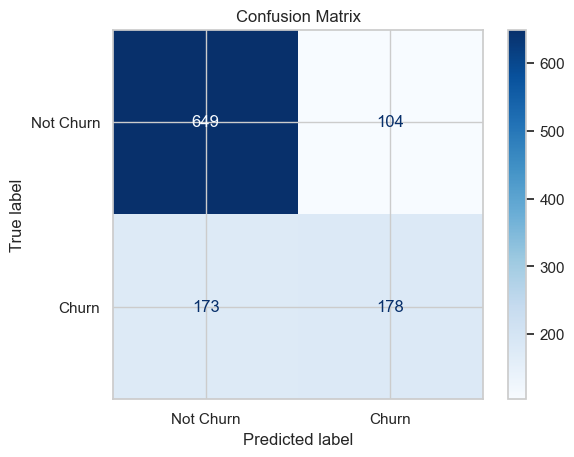

In [405]:
# Confusion Matrix of the the Logistic Regression
# Visualization of the models prediction 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [406]:
# now we test how the model will perform using other different kind of classification models 
""" Now we import the necessary librariees and model that we can use to test my logistical model"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Now we initialize the models 
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(n_estimators =100 , random_state=42)

#Now we train all the newly introduced models 
dtc.fit(X_train,y_train)
rfc.fit(X_train , y_train)

#Now we predict using all the models 
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)

# We the evaluate each model 
""" first lets test the decsision tree evaluation """
print(" ----- Decision Tree ------ ")
print("Accuracy:" , accuracy_score(y_test , dtc_pred))
print(classification_report(y_test , dtc_pred , target_names= ["Not Churn" , "Churn"] ))

# Second Value to evaluate 
"""We evaluate the random forest model"""
print("---- Random Forest ------")
print("Accuracy :" , accuracy_score(y_test , rfc_pred))
print(classification_report(y_test , rfc_pred, target_names= ["Not Churn" , "Churn"] ))



 ----- Decision Tree ------ 
Accuracy: 0.6612318840579711
              precision    recall  f1-score   support

   Not Churn       0.76      0.74      0.75       753
       Churn       0.47      0.50      0.48       351

    accuracy                           0.66      1104
   macro avg       0.61      0.62      0.62      1104
weighted avg       0.67      0.66      0.66      1104

---- Random Forest ------
Accuracy : 0.7336956521739131
              precision    recall  f1-score   support

   Not Churn       0.77      0.86      0.82       753
       Churn       0.61      0.46      0.52       351

    accuracy                           0.73      1104
   macro avg       0.69      0.66      0.67      1104
weighted avg       0.72      0.73      0.72      1104



In [407]:
# Now lests compare the results and see 
results = {
    'Logistic Regression': accuracy_score(y_test, y_pred),
    'Decision Tree': accuracy_score(y_test, dtc_pred),
    'Random Forest': accuracy_score(y_test, rfc_pred)
}

print("-------- Model Accuracy Comparison ----- ")
for model, score in results.items():
    print(f"{model}: {score:.2f}")


-------- Model Accuracy Comparison ----- 
Logistic Regression: 0.75
Decision Tree: 0.66
Random Forest: 0.73


In [408]:
# Now we carrying out voting 

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('dt', dtc),
        ('rf', rfc)
    ],
    voting='hard'  # Change to 'soft' if using predict_proba
)

#Train the model 
voting_clf.fit(X_train , y_train)

# Evaluation of the model
v_pred = voting_clf.predict(X_test)

print("----- Voting Classifier -----")
print("Accuracy:", accuracy_score(y_test, v_pred))
print(classification_report(y_test, v_pred ,target_names= ["No Churn" , "Churn"]))



c:\Users\Admin\Desktop\Projects\Predicting-Customer-Churn-in-E-commerce\cbenv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----- Voting Classifier -----
Accuracy: 0.7373188405797102
              precision    recall  f1-score   support

    No Churn       0.78      0.85      0.82       753
       Churn       0.61      0.49      0.54       351

    accuracy                           0.74      1104
   macro avg       0.69      0.67      0.68      1104
weighted avg       0.73      0.74      0.73      1104



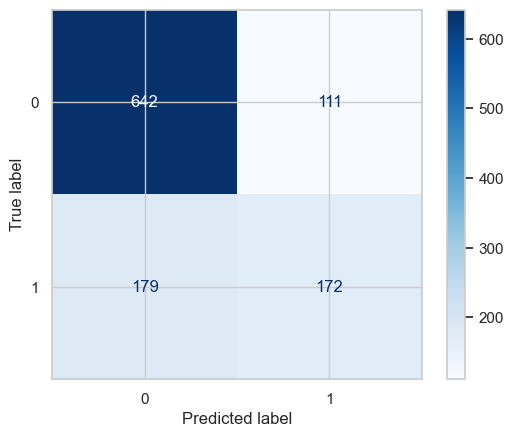

In [409]:
# Visualizing the confusion Matrix after voting 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict with voting classifier
y_pred = voting_clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap="Blues")


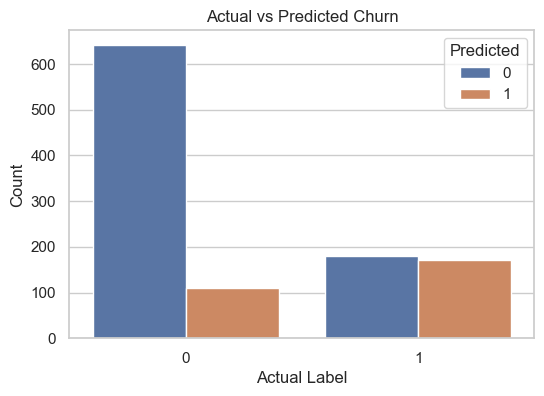

In [410]:
# VISUALIZATION TWO FOR SHOWING THE ACCURACY OF THE MODEL 
# Create DataFrame for predictions
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Count plot
plt.figure(figsize=(6,4))
sns.countplot(x="Actual", hue="Predicted", data=pred_df)
plt.title("Actual vs Predicted Churn")
plt.xlabel("Actual Label")
plt.ylabel("Count")
plt.legend(title="Predicted")
plt.show()


In [411]:
from sklearn.metrics import classification_report
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Not Churn", "Churn"]))


📋 Classification Report:

              precision    recall  f1-score   support

   Not Churn       0.78      0.85      0.82       753
       Churn       0.61      0.49      0.54       351

    accuracy                           0.74      1104
   macro avg       0.69      0.67      0.68      1104
weighted avg       0.73      0.74      0.73      1104



- This is a confusion matrix — a powerful tool for evaluating classification models. It shows how well your model is performing in terms of predicting churn vs. not churn.

Let's break it down in detail based on what your image shows:

|                       | **Predicted: Not Churn** | **Predicted: Churn**     |
| --------------------- | ------------------------ | ------------------------ |
| **Actual: Not Churn** | **649 (True Negative)**  | **104 (False Positive)** |
| **Actual: Churn**     | **173 (False Negative)** | **178 (True Positive)**  |



## DEFINITIONS
- True Positives (TP) = 178 → Correctly predicted churn customers.

- True Negatives (TN) = 649 → Correctly predicted non-churn customers.

- False Positives (FP) = 104 → Predicted churn, but customer actually didn’t churn.

- False Negatives (FN) = 173 → Predicted not churn, but customer actually churned.



In [412]:
print("Expected number of features:", voting_clf.estimators_[0].n_features_in_)


Expected number of features: 18


In [413]:
# Sample unseen encoded input
unseen_input = np.array([
    0, 0, 1, 0, 1, 0, 1, 0, 
    0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 
    1, 2, 142, 2505
])  # ✅ 18 features

unseen_input = unseen_input.reshape(1, -1)

# Predict
pred = voting_clf.predict(unseen_input)
print("Predicted class:", pred[0])


Predicted class: 0


# Save the model so that we can create the interactive model


In [ ]:
# Save the model to a file
joblib.dump(voting_clf, "churn_model.pkl")


# Load your model
model = joblib.load("churn_model.pkl")

# Title
st.title("Customer Churn Prediction App")

st.write("Enter customer details to predict if they are likely to churn:")

# Input fields
gender = st.selectbox("Gender", ["Male", "Female"])
senior = st.selectbox("Senior Citizen?", [0, 1])
partner = st.selectbox("Has a Partner?", ["Yes", "No"])
dependents = st.selectbox("Has Dependents?", ["Yes", "No"])
tenure = st.slider("Tenure (in months)", 0, 72)
phone = st.selectbox("Phone Service", ["Yes", "No"])
multi_lines = st.selectbox("Multiple Lines", ["Yes", "No", "No phone service"])
internet = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
online_sec = st.selectbox("Online Security", ["Yes", "No", "No internet service"])
tech_support = st.selectbox("Tech Support", ["Yes", "No", "No internet service"])
contract = st.selectbox("Contract Type", ["Month-to-month", "One year", "Two year"])
paperless = st.selectbox("Paperless Billing", ["Yes", "No"])
payment = st.selectbox("Payment Method", ["Electronic check", "Mailed check", "Bank transfer", "Credit card"])
monthly_charges = st.number_input("Monthly Charges", min_value=0.0, step=0.1)
total_charges = st.number_input("Total Charges", min_value=0.0, step=0.1)

# # Button
# if st.button("Predict Churn"):
#     # Example: encode inputs manually (replace with your actual preprocessing)
#     encoded_input = np.array([
#         1 if gender == "Male" else 0,
#         senior,
#         1 if partner == "Yes" else 0,
#         1 if dependents == "Yes" else 0,
#         tenure,
#         1 if phone == "Yes" else 0,
#         1 if multi_lines == "Yes" else 0,
#         0 if internet == "No" else (1 if internet == "DSL" else 2),
#         1 if online_sec == "Yes" else 0,
#         1 if tech_support == "Yes" else 0,
#         0 if contract == "Month-to-month" else (1 if contract == "One year" else 2),
#         1 if paperless == "Yes" else 0,
#         0 if payment == "Electronic check" else (1 if payment == "Mailed check" else 2),
#         monthly_charges,
#         total_charges
#     ]).reshape(1, -1)

#     # Predict
#     prediction = model.predict(encoded_input)[0]
#     result = "Churn" if prediction == 1 else "Not Churn"
#     st.success(f"Prediction: The customer is likely to **{result}**.")




2025-08-01 09:21:55.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 09:21:55.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 09:21:55.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 09:21:55.947 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 09:21:55.948 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 09:21:55.949 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 09:21:55.951 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 09:21:55.953 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [415]:
pickle.dump(log_reg , open('model.pkl' , 'wb'))